<p style="text-align: center;"><font size="8"><b>Genetic Algorithms</b></font><br>

Genetic algorithms (GA) are another optimization method. This method is part of a class of algorithms called *evolutionary algorithms* that mirror the process of natural selection. 

In natural selection the most fit individuals breed to produce children that may or may not be more fit. Random mutations can occur and these mutations be positive (think X-men) or negative. Over a long enough time period (many generations) this combination of mutations and natural selection makes the population as a whole more fit.

# Brief description of algorithm
1. Create a random initial population (generation 0)
2. Create a new sequence of populations. Each new generation is determined from the previous generation as follows:
    - Each individual is assigned a fittness score
    - Parents are selected based on their fitness
    - Some individuals in the current population are chosen as *elite*. These individuals are passed directly to the next generation
    - Children are created from parents, either from *mutation* of a single parent or by combining parents somehow (*crossover*)
3. The algorithm stops when some stopping criteria is met (more on this later)

That probably all makes no sense right now. Let's go through a concrete example. 

Say we want to find the minimum of the function 

$$ f(x,y) = 8x^2 + y^2.$$

So how would we program this? What will we need?

Let's think of the final product. In the end we'd like a class called `ga`, with a method `optimize` that takes in a function that we want to optimize. For example we might call:
    
    g = ga( *some parameters* )
    x_min = g.optimize(lambda x: 8*x[0]**2 + x[1]**2)

`ga` will be a class. What methods will it have?

Obviously it will have an `optimize` method. What else?

1. It will need a method to determine an initial population, let's say `initial_population`
2. It will need another method to determine subsequent generations, let's call this method `next_generation`

How will we create the next generation? From the algorithm description, we will need the following:
- elite children
- mutation children
- crossover children

In [ ]:
class ga( ):

    def __init(self):
        self.p = initial_population(N)
            
    def _initial_population(self, N):
        """
        Determines the initial population (generation 0)
        
        Parameters:
        -----------
        N : int
            size of initial population
            
        Returns:
        --------
        P : numpy array
            initial population
            
        """
        
    def _next_generation():
        """
        Advances the population a single generation
        
        Returns:
        -------
        P : numpy array
            new population
            
        """
        
    def _score_population(f):
        """
        Scores each individual in the population
        
        Parameters:
        -----------
        f : function
            objective function
        
        Returns:
        -------
        scores : numpy array
            an array sorted by score containing the individual and their score
            
        """
     
    def _elite_children():
        
        
    def _scor
    

## Initial Population

The first step is to create a random initial population. What does this mean?

If we say an individual can be represented as a point $(x_k, y_k)$, then the initial population would be a set of individuals represented by points $\{x_k, y_k\}$, where $k$ goes from 0 to some large number $K$ (say around 1000). 

So let's write a function that does this. We'll need an upper and lower bound for both $x$ and $y$. These will be inputs to the function, along with the number of individuals $K$.

In [2]:
import numpy as np

def initial_population(K=1000, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # create a random array of K rows and 2 columns 
    population = np.random.rand(K, 2) 
    
    # scale from range (0,1)x(0,1) to (xmin,xmax)x(ymin,ymax)
    for k in range(K):
        population[k,0] = population[k,0]*(xmax-xmin) + xmin
        population[k,1] = population[k,1]*(ymax-ymin) + ymin
        
    return population

We can test this out. Let's create an initial population of size 1000 in the range (-10,10)x(-10,10).

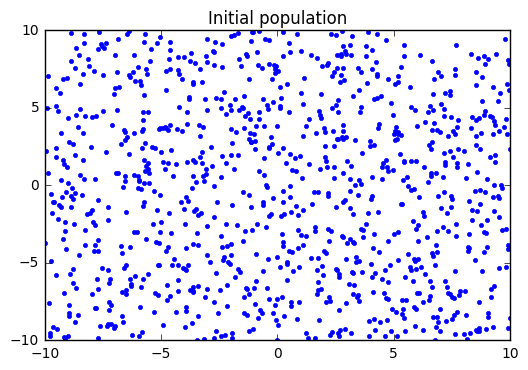

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

p0 = initial_population(1000,-10,10,-10,10)
plt.plot(p0[:,0], p0[:,1], '.')
plt.title("Initial population")

## Creating the Next Generation

As mentioned above, the next generation is created from the current generation. First we have the assign a fitness score to all the individuals in the current generation. To score them we will simply plug each point into $f(x,y)$.

Again we can create function that does this for us:

In [4]:
def score_population(p, f):
    
    # plug every row of p into f
    scores = np.apply_along_axis(f, 1, p)
    scores = scores.reshape(len(scores),1)
    # sort scores
    
    # first append population as last two columns to score
    # matrix will now look like (x,y,score)
    scores = np.append(p, scores, 1)
    
    # sort by last column 
    scores = scores[scores[:,-1].argsort()]
    
    return scores

[[  2.47625281e-01  -3.74668470e-01   6.30922701e-01]
 [ -2.06342071e-01  -7.98308941e-01   9.77913567e-01]
 [  2.27399166e-01  -1.06981283e+00   1.55818255e+00]
 ..., 
 [ -9.79710599e+00  -9.71326430e+00   8.62213790e+02]
 [  9.90953255e+00  -9.21521932e+00   8.70510950e+02]
 [  9.99470997e+00  -8.54499303e+00   8.72170725e+02]]


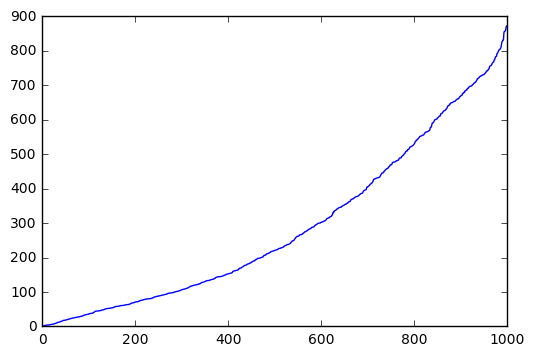

In [5]:
f = lambda x: 8*x[0]**2 + x[1]**2
scores = score_population(p0, f)
print(scores)
plt.plot(scores[:,2])

### Elite Children

To generate the next generation, we first find the *elite children*. These children are passed directly to the next generation. These will typically be the best scoring members of the generation. The number of elite children is up to the user, but is typically small, around 2-4. 

In [6]:
def elite_children(p, n=2):
    
    # take elite children (no score)
    elite = p[0:n,0:2]
    
    # remove from population
    p = np.delete(p, np.arange(0,n), 0)
    
    return elite, p

In [7]:
elite, scores = elite_children(scores)
print(elite)
print(scores)

[[ 0.24762528 -0.37466847]
 [-0.20634207 -0.79830894]]
[[  2.27399166e-01  -1.06981283e+00   1.55818255e+00]
 [ -4.67876806e-01  -1.11138803e-01   1.76362148e+00]
 [ -5.08471795e-01   4.77731628e-02   2.07063081e+00]
 ..., 
 [ -9.79710599e+00  -9.71326430e+00   8.62213790e+02]
 [  9.90953255e+00  -9.21521932e+00   8.70510950e+02]
 [  9.99470997e+00  -8.54499303e+00   8.72170725e+02]]


### Selecting Parents

From the remaining population, we have to select a number of parents. Let's call this number $N$. There are many ways to choose these parents. A simple way is choose a random set of $M$ individuals and make the most fit individual from this group a parent. Typically $M$ will be relatively small, for example 4. 

There's no good way to choose $N$, but setting it to be 25% of the total population often works well.

In [8]:
def select_parents(scores, n = 0.25, M = 4):
    
    # compute number of parents
    N = int(n*len(scores))
    
    parents = []
    for i in range(N):
        
        # create pool of possible parents
        pool = []
        for j in range(M):
            r = np.random.randint(0,len(scores))
            pool.append(scores[r,:])
        
        # sort pool
        pool = np.array(pool)
        pool = pool[pool[:,-1].argsort()]
        
        # add individual with best score
        parents.append(pool[0,:])
        
    return np.array(parents)   

(249, 3)


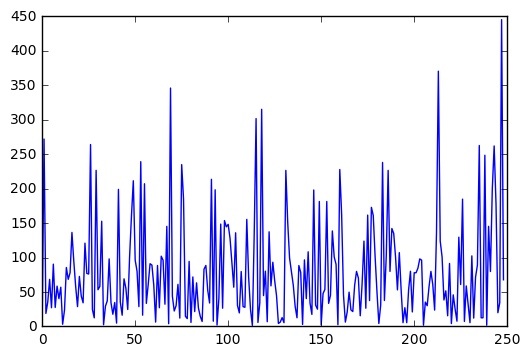

In [9]:
parents = select_parents(scores)
print(parents.shape)
plt.plot(parents[:,2])

### Crossover Children

To make crossover children we will take two parents and "combine their genes". What does this mean?

One interpretation (there are others) is to look at the coordinates of the parents as genes. We can create a random binary vector of the same length as the genes and then select genes from parent 1 where the binary vector is 0 and genes from parent 2 where the binary vector is 1.

For example, suppose parent 1 has genes [a, b] and parent 2 has genes [c, d]. The random binary vector [1, 0] would then create the child [c, b]. Note that in this case [0, 0] would create the child [a,b], and [1,1] would create the child [c,d], i.e. the parents are passed directly to the next generation as children. 

In [10]:
def crossover_children(parents, N):
    
    children = []    
    for i in range(N):
        
        # create random binary vector
        r = np.array([np.random.randint(0,2),np.random.randint(0,2)])
        
        # choose 2 parents
        p1 = parents[np.random.randint(0,len(parents)), 0:2]
        p2 = parents[np.random.randint(0,len(parents)), 0:2]
        
        # get genes
        if r[0] == 0:
            g1 = p1[0]
        else:
            g1 = p2[0]
            
        if r[1] == 0:
            g2 = p1[1]
        else:
            g2 = p2[1]
            
        children.append(np.array([g1,g2]))
        
    return np.array(children)

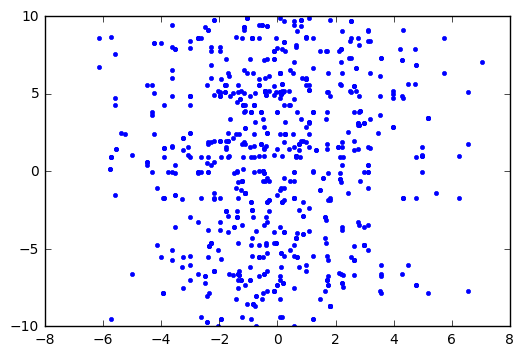

In [11]:
crossover = crossover_children(parents, 800)
plt.plot(crossover[:,0],crossover[:,1], '.')

### Mutation Children

To make mutation children we will take a random parent and add a normal random number to each gene. The mean of the distribution will be 0 and the standard deviation will depend upon the generation number. Initially we want this standard deviation to be large in order to more fully explore the space, however as we progress we want to decrease the standard deviation. We will use the formula:

$\sigma_k = \sigma_0\left(1 - \frac{k}{G}\right)$
where $G$ is the maximum possible number of generations. Thus when $k = G$ the standard deviation is 0 and there is effectively no mutation.

In [12]:
def mutation_children(parents, N, k, sigma0 = 2, G = 20):
    
    # compute standard deviation
    sigma = sigma0*(1 - k/G)
    
    children = []
    for i in range(N):
        r = np.random.randint(0,len(parents))
        
        g1 = parents[r,0] + sigma*np.random.randn()
        g2 = parents[r,1] + sigma*np.random.randn()
        
        children.append(np.array([g1,g2]))
        
    return np.array(children)

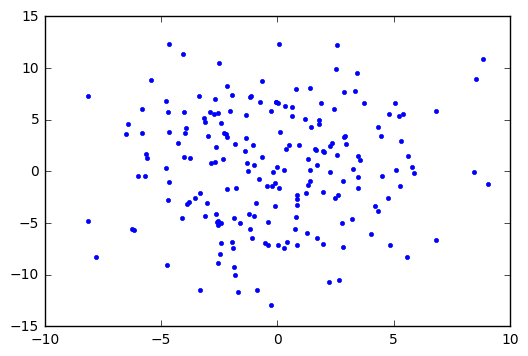

In [13]:
mutations = mutation_children(parents, 200, 0)
plt.plot(mutations[:,0],mutations[:,1], '.')

## Putting It All Together

In [14]:
def ga(f, xmin, xmax, ymin, ymax, N, Gmax=20):
    
    population = []
    population.append(initial_population(N, xmin,xmax,ymin,ymax))
    
    for k in range(Gmax):

        scores = score_population(population[-1], f)
        elites, scores = elite_children(scores)
        
        parents = select_parents(scores)
        crossovers = crossover_children(parents, int(0.8*N))
        mutations = mutation_children(parents, int(0.2*N), k)
        
        # create next generation
        all_children = np.append(elites, crossovers, 0)
        all_children = np.append(all_children, mutations, 0)
        
        population.append(all_children)
        
    return population

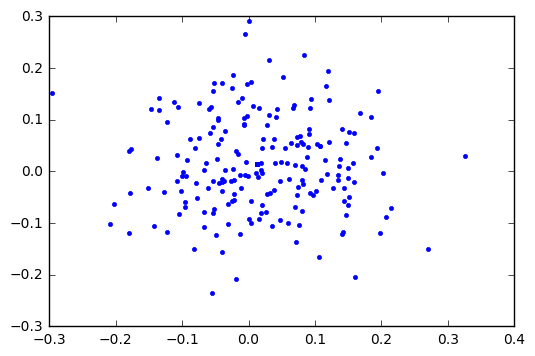

In [15]:
f = lambda x: 20 + x[0]**2 - 20*np.cos(2*np.pi*x[0]) +  x[1]**2 - 20*np.cos(2*np.pi*x[1])
max_generations = 20
N = 1000
generations = ga(f, -4, 4, -4, 4, N, max_generations)

plt.plot(generations[-1][:,0], generations[-1][:,1], '.')

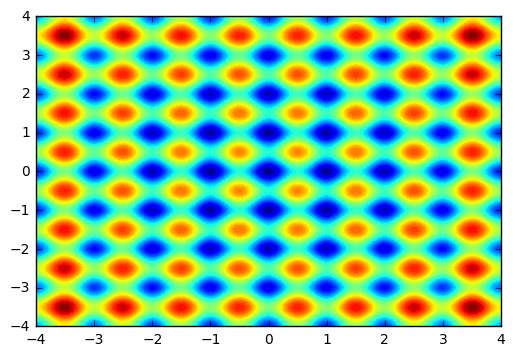

In [20]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# configure matplotlib animations to display in notebook
rc('animation', html='html5')

# create an empty figure and axis
fig, ax = plt.subplots()

# set axis limits, these will not change during the animation
xmin = -4
xmax = 4
ymin = -4
ymax = 4
ax.set_xlim((xmin,xmax))
ax.set_ylim((ymin,ymax))

# plot f(x,y), this will be on every frame
x = np.linspace(xmin,xmax,1000)
y = np.linspace(ymin,ymax,1000)
X, Y = np.meshgrid(x,y)
plt.contourf(X,Y,f(np.array([X,Y])),50)

# add data set for generations data, we will edit this every frame
population, = ax.plot([],[],'.r')

# at this point since we matplotlib is in inline mode, it prints a blank figure

In [21]:
# define initialization function
def init():
    population.set_data(generations[0][:,0], generations[0][:,1])

# define update function
def update(k):
    ax.set_title("Generation " + str(k))
    population.set_data(generations[k][:,0], generations[k][:,1])

anim = FuncAnimation(fig, update, init_func=init, frames=range(0,max_generations), interval=500)
anim